# Chicago Public Schools - Graduation Rate Analysis

### Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# read in cleaned data
hs_data = pd.read_csv('processed_nodummies.csv', header=0, sep=',')
hs_data.head()

,School_ID,School_Type,Student_Count_Total,ADA_Accessible,Dress_Code,Bilingual_Services,Refugee_Services,Title_1_Eligible,Average_ACT_School,College_Enrollment_Rate_School,...,Student_Attendance_Change,Teacher_Attendance_Change,One_Year_Dropout_Rate_Change,Student_Low_Income_Pct,Student_Special_Ed_Pct,Student_English_Learners_Pct,Student_Black_Pct,Student_Hispanic_Pct,Student_White_Pct,Student_Asian_Pct
0,609764,Neighborhood,1739,Generally accessible,N,Y,Y,Y,16.5,50.6,...,-0.3,4.8,-0.4,0.953997,0.161587,0.190339,0.033353,0.945371,0.006901,0.002875
1,400054,Charter,992,Generally accessible,Y,N,N,Y,21.9,85.7,...,0.6,0.0,-0.8,0.943548,0.106855,0.120968,0.030242,0.952621,0.009073,0.001008
2,609726,Selective enrollment,959,Fully Accessible,N,N,N,Y,22.5,85.1,...,0.0,4.7,-1.2,0.721585,0.061522,0.002086,0.789364,0.182482,0.007299,0.001043
3,400094,Charter,523,Generally accessible,Y,Y,N,Y,17.5,72.7,...,-0.9,0.0,0.6,0.938815,0.223709,0.137667,0.632887,0.355641,0.003824,0.000000
4,609755,Selective enrollment,2156,Generally accessible,N,Y,N,N,27.9,85.2,...,-0.6,4.7,0.6,0.413265,0.066790,0.010668,0.213822,0.298701,0.282468,0.159091


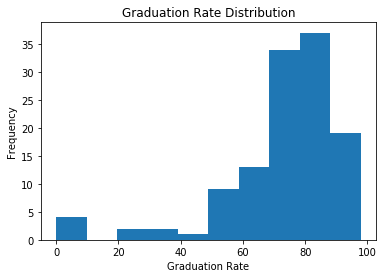

In [2]:
# distribution of target variable (graduation rate)

plt.hist(hs_data['Graduation_Rate_School'])
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.title('Graduation Rate Distribution')
plt.show()

In [3]:
# Categorical Variables
hs_data.describe(exclude=[np.number]).T


,count,unique,top,freq
School_Type,121,10,Neighborhood,44
ADA_Accessible,121,3,Generally accessible,66
Dress_Code,121,2,Y,78
Bilingual_Services,121,3,Y,67
Refugee_Services,121,3,N,107
Title_1_Eligible,121,2,Y,111
Overall_Rating,121,6,Level 1+,31
Rating_Status,121,4,Good Standing,53
Student_Growth_Rating,121,6,BELOW AVERAGE,40
Student_Attainment_Rating,121,6,BELOW AVERAGE,64


#### Factors by School Type

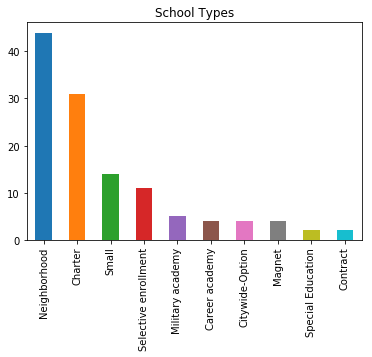

In [4]:
# distribution of school type
hs_data['School_Type'].value_counts().plot(kind='bar', title='School Types')

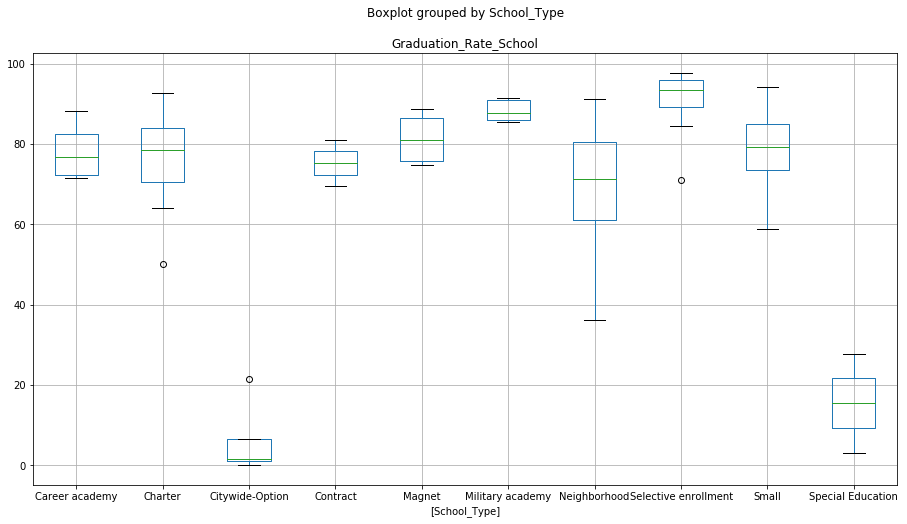

In [2]:
# graduation rate by school type

hs_data.boxplot(column=['Graduation_Rate_School'],by=['School_Type'], figsize=(15,8))

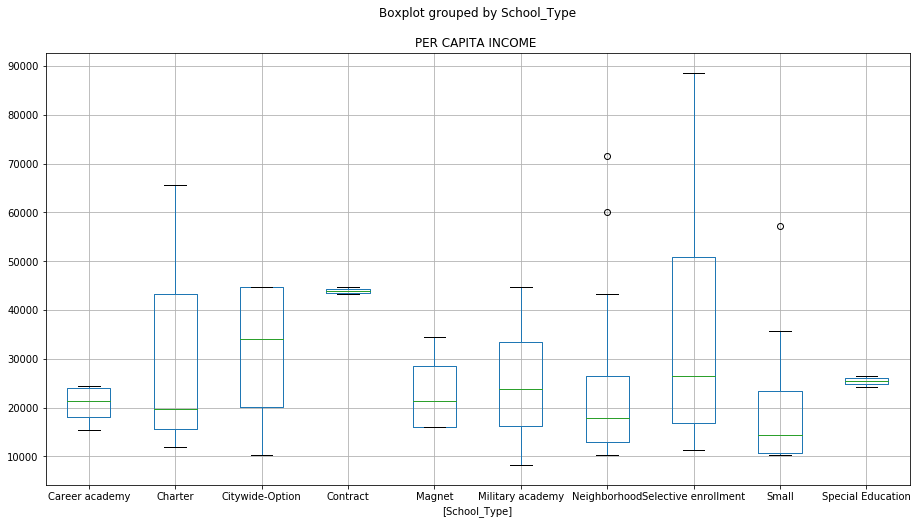

In [5]:
#income
hs_data.boxplot(column=['PER CAPITA INCOME '],by=['School_Type'], figsize=(15,8))

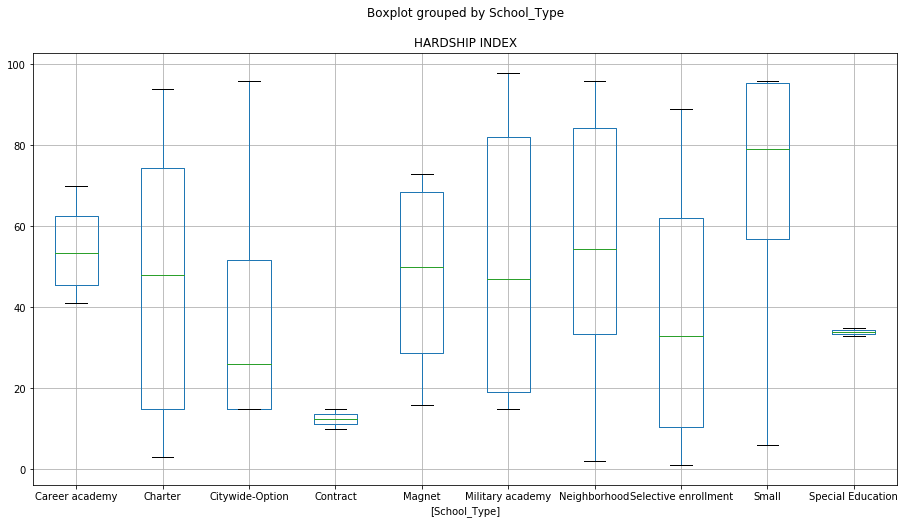

In [6]:
#hardship index
hs_data.boxplot(column=['HARDSHIP INDEX'],by=['School_Type'], figsize=(15,8))

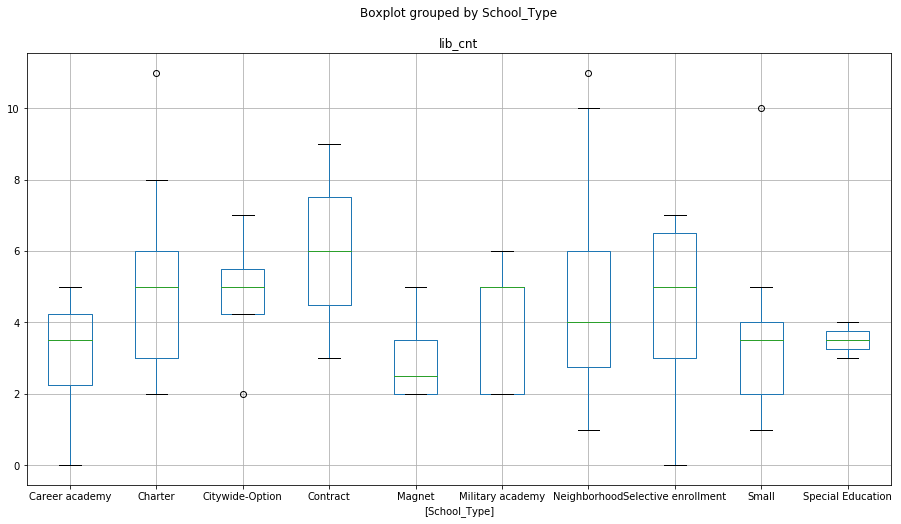

In [7]:
#Library count by school type
hs_data.boxplot(column=['lib_cnt'],by=['School_Type'], figsize=(15,8))

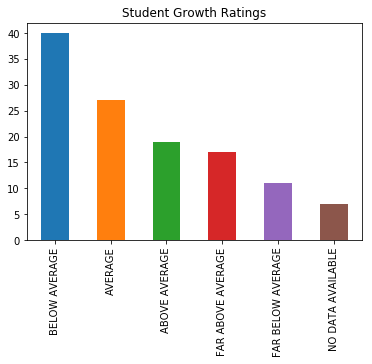

In [8]:
# distribution of student growth rating
hs_data['Student_Growth_Rating'].value_counts().plot(kind='bar', title='Student Growth Ratings')

#### School Rating

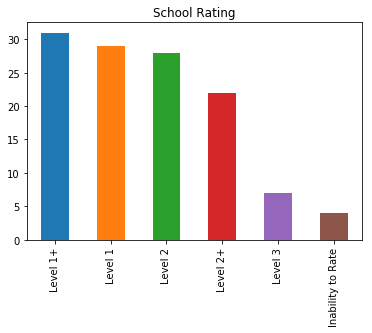

In [9]:
#distribution of overall rating
hs_data['Overall_Rating'].value_counts().plot(kind='bar', title='School Rating')

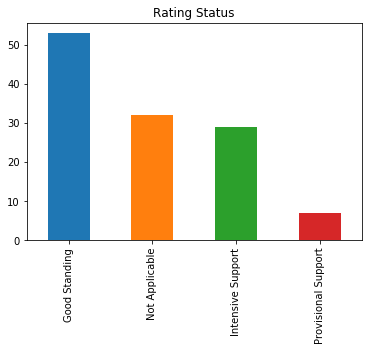

In [10]:
#rating status
hs_data['Rating_Status'].value_counts().plot(kind='bar', title='Rating Status')

#### Languages

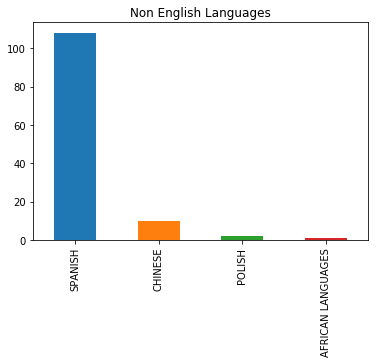

In [11]:
# distirubtion of overall language
hs_data['PRED_NON_ENG_LANG'].value_counts().plot(kind='bar', title='Non English Languages')

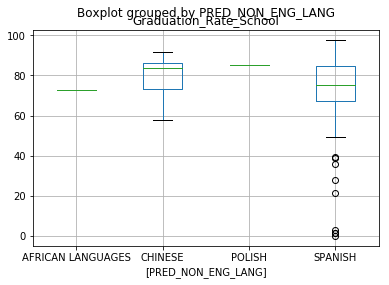

In [12]:
# Graduation rate by predominant languages
hs_data.boxplot(column=['Graduation_Rate_School'],by=['PRED_NON_ENG_LANG'])

#### Correlation Analysis

In [4]:
data=pd.read_csv('processed_nodummies.csv', index_col=0)
pd.set_option('display.max_columns', 100)
data.corr()

,Student_Count_Total,Average_ACT_School,College_Enrollment_Rate_School,Graduation_Rate_School,Growth_ACT_Grade_11_Pct,Attainment_ACT_Grade_11_Pct,Freshmen_On_Track_School_Pct_Year_2,College_Persistence_School_Pct_Year_2,lib_cnt,PRED_NON_ENG_PERCENT,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Suspensions_Per_100_Students_Change,Misconducts_To_Suspensions_Change,Student_Attendance_Change,Teacher_Attendance_Change,One_Year_Dropout_Rate_Change,Student_Low_Income_Pct,Student_Special_Ed_Pct,Student_English_Learners_Pct,Student_Black_Pct,Student_Hispanic_Pct,Student_White_Pct,Student_Asian_Pct
Student_Count_Total,1.000000,0.511578,0.382159,0.394248,0.258348,0.516508,0.197958,0.514897,-0.171297,0.057571,-0.109958,-0.452239,-0.348923,-0.153515,-0.133243,0.296633,-0.305674,0.015912,-0.228568,-0.100226,0.160758,0.023408,-0.516919,-0.405661,-0.005903,-0.442892,0.257746,0.519923,0.451429
Average_ACT_School,0.511578,1.000000,0.681003,0.457470,0.764274,0.976073,0.441153,0.754701,-0.020359,-0.103465,-0.226397,-0.377372,-0.418882,-0.324153,-0.402597,0.567241,-0.470728,0.010552,-0.153501,-0.079097,-0.075312,-0.020547,-0.785647,-0.419518,-0.172616,-0.408583,0.163246,0.617799,0.536054
College_Enrollment_Rate_School,0.382159,0.681003,1.000000,0.645281,0.637397,0.685473,0.208039,0.663431,0.054676,-0.252307,-0.307345,-0.173824,-0.230111,-0.364637,-0.312639,0.438849,-0.373923,0.068257,-0.157312,-0.083962,-0.347688,0.028358,-0.494818,-0.593493,-0.350413,-0.084922,-0.042984,0.256177,0.289163
Graduation_Rate_School,0.394248,0.457470,0.645281,1.000000,0.341786,0.448929,0.289740,0.466795,-0.080754,0.051327,-0.055941,-0.098053,-0.109927,-0.048660,-0.122902,0.175933,-0.106645,0.039575,-0.084506,-0.233488,-0.037076,0.071752,-0.270463,-0.607763,-0.082128,-0.287012,0.237639,0.130520,0.224593
Growth_ACT_Grade_11_Pct,0.258348,0.764274,0.637397,0.341786,1.000000,0.803953,0.352606,0.608334,-0.030195,-0.062952,-0.194165,-0.273891,-0.333503,-0.240084,-0.390921,0.427886,-0.379745,0.040372,-0.074462,0.000967,-0.443462,0.086543,-0.412136,-0.280891,-0.053897,-0.324475,0.229990,0.266589,0.273846
Attainment_ACT_Grade_11_Pct,0.516508,0.976073,0.685473,0.448929,0.803953,1.000000,0.423322,0.742825,-0.015421,-0.092878,-0.216165,-0.382084,-0.432523,-0.314149,-0.419218,0.554450,-0.473863,0.005226,-0.153555,-0.081823,-0.101359,-0.001925,-0.752198,-0.417196,-0.152597,-0.423779,0.201377,0.576561,0.499711
Freshmen_On_Track_School_Pct_Year_2,0.197958,0.441153,0.208039,0.289740,0.352606,0.423322,1.000000,0.434973,-0.149321,-0.004741,-0.153586,-0.296757,-0.266200,-0.180169,-0.204267,0.261334,-0.285659,0.104658,-0.058024,-0.144223,0.100520,0.106979,-0.321223,-0.143629,-0.007321,-0.275010,0.201539,0.243015,0.169388
College_Persistence_School_Pct_Year_2,0.514897,0.754701,0.663431,0.466795,0.608334,0.742825,0.434973,1.000000,-0.174328,0.037170,-0.148032,-0.426867,-0.399680,-0.204128,-0.308290,0.413941,-0.388481,0.124642,-0.076215,-0.063392,-0.195620,0.136326,-0.604900,-0.406162,-0.006750,-0.410136,0.244030,0.450014,0.409179
lib_cnt,-0.171297,-0.020359,0.054676,-0.080754,-0.030195,-0.015421,-0.149321,-0.174328,1.000000,-0.138656,0.006141,0.199057,0.028400,-0.058170,-0.119533,0.040293,0.012334,0.026840,-0.004187,0.165987,-0.202516,-0.196525,0.034608,0.022185,-0.119395,0.111447,-0.114240,-0.050870,0.022438
PRED_NON_ENG_PERCENT,0.057571,-0.103465,-0.252307,0.051327,-0.062952,-0.092878,-0.004741,0.037170,-0.138656,1.000000,0.783187,-0.046323,-0.158211,0.841105,0.065367,-0.364441,0.422869,0.072805,0.155969,-0.027972,0.182455,0.065158,0.237120,-0.029012,0.637566,-0.600439,0.732041,-0.117105,-0.089205


Graduation rate appears to have a strong positive correlation with College_Enrollment_Rate_School (0.65). Student_Special_Ed_Pct has strong negative correlation with graduation rate (-0.61).

Several variables have a weak positive correlation with graduation rate: 

1. College_Persistence_School_Pct_Year_2 (0.47)
2. Attainment_ACT_Grade_1 (0.45)
3. Growth_ACT_Grade_11_Pct (0.34)
4. Average_ACT_School (0.46)
5. Student_Count_Total (0.39)

#### Target Variable Distribution

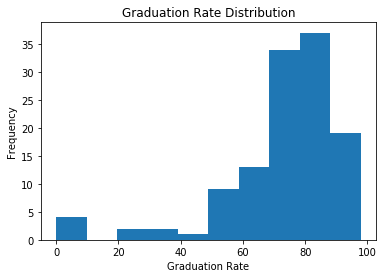

In [14]:
# distribution of target variable (graduation rate)

plt.hist(hs_data['Graduation_Rate_School'])
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.title('Graduation Rate Distribution')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23885890>,
      dtype=object)

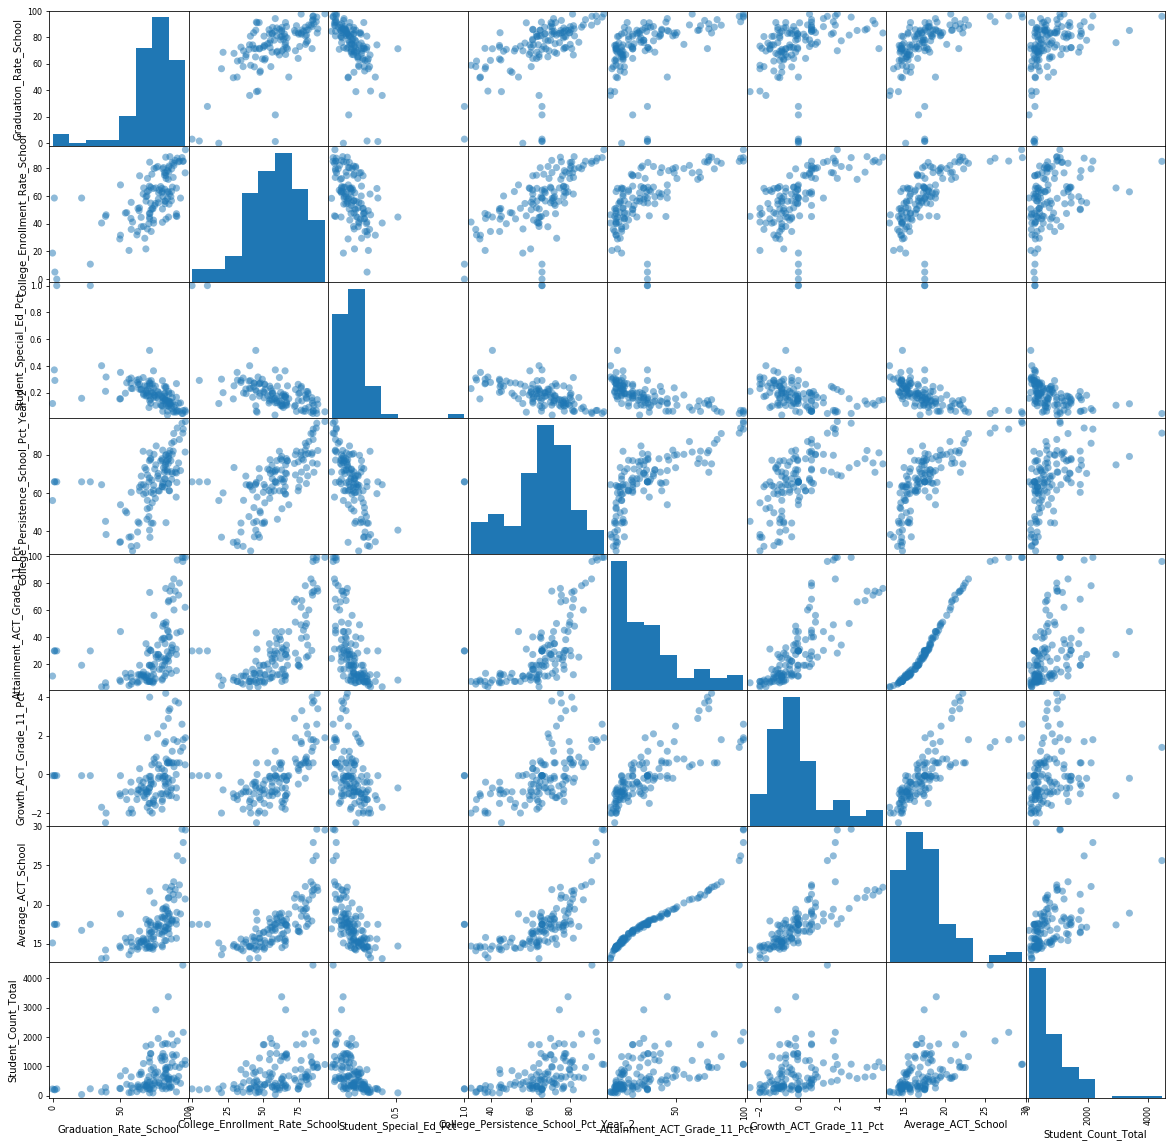

In [53]:
# scatter matrix
pd.plotting.scatter_matrix(data[['Graduation_Rate_School','College_Enrollment_Rate_School','Student_Special_Ed_Pct','College_Persistence_School_Pct_Year_2','Attainment_ACT_Grade_11_Pct','Growth_ACT_Grade_11_Pct','Average_ACT_School','Student_Count_Total']], figsize=(20,20), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

Graduation Rate and College Enrollment Rate have a distribution that is left skewed.
Student Special Ed, ACT result variables and Student Count are all skewed to the right.
College Persistence variable is aproximately normally disributed.

### Regression Modeling

#### Random Forest Regressor

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
% matplotlib inline

x=pd.read_csv('processed_scaled.csv',index_col=0)
x.drop('Graduation_Rate_School', axis=1,inplace=True)
y=pd.read_csv('grad_rate.csv', header=None)[1].values

#### Performing random search to find best hyperparameters

In [17]:
rf = RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=5)

rf_params = {'n_estimators': randint(5,100), 
             'max_features':randint(10, 50),
             'max_depth': randint(5, 10), 
             'min_samples_split': randint(5, 20)}

rand_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=5, n_jobs=-1, n_iter=50)
rand_search.fit(x, y)
print rand_search.best_score_
print rand_search.best_params_

0.7148266277146783
{'max_features': 45, 'min_samples_split': 7, 'n_estimators': 21, 'max_depth': 8}


#### Building model with best parameters

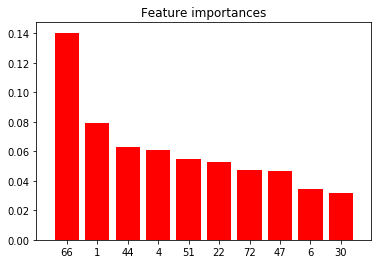

In [18]:
# building model with best params
rf = RandomForestRegressor(n_estimators=34, max_features=36, min_samples_split=5, max_depth=8, n_jobs=-1, random_state=5)
rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_ten = indices[:10]

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[top_ten],
       color="r", align="center")
plt.xticks(range(10), top_ten)
plt.xlim([-1, 10])
plt.show()

In [19]:
# get names of important features
for i in top_ten:
    print x.columns[i]

Student_Growth_Rating_NO DATA AVAILABLE
Average_ACT_School
Bilingual_Services_U
Attainment_ACT_Grade_11_Pct
Overall_Rating_Inability to Rate
Student_Special_Ed_Pct
Student_Attainment_Rating_NO DATA AVAILABLE
Refugee_Services_U
College_Persistence_School_Pct_Year_2
School_Type_Citywide-Option


### Principal Component Analysis

In [5]:
continuous_data=data[['Student_Count_Total','Average_ACT_School','College_Enrollment_Rate_School','Growth_ACT_Grade_11_Pct','Attainment_ACT_Grade_11_Pct','Freshmen_On_Track_School_Pct_Year_2','College_Persistence_School_Pct_Year_2','lib_cnt','PRED_NON_ENG_PERCENT','PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY','PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64','PER CAPITA INCOME ','HARDSHIP INDEX','Suspensions_Per_100_Students_Change','Misconducts_To_Suspensions_Change','Student_Attendance_Change','Teacher_Attendance_Change','One_Year_Dropout_Rate_Change','Student_Low_Income_Pct','Student_Special_Ed_Pct','Student_English_Learners_Pct','Student_Black_Pct','Student_Hispanic_Pct','Student_White_Pct','Student_Asian_Pct']]
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit(continuous_data)
continuous_scaled=pd.DataFrame(min_max.transform(continuous_data),index=continuous_data.index.values,columns=continuous_data.columns.values)

from sklearn import decomposition
pca =  decomposition.PCA(n_components=10)
data_scaled_pca = pca.fit(continuous_scaled)
np.set_printoptions(precision=2,suppress=True,threshold=np.nan)
pd.set_option('display.max_rows', 500)
print 'Explained Variance per Principal Component'
print(data_scaled_pca.explained_variance_ratio_)

Explained Variance per Principal Component
[0.31 0.29 0.09 0.08 0.03 0.03 0.02 0.02 0.02 0.02]


All 10 components explain 91% of the variance. This is nearly 1/3 reduction in variables, while explaining over 90% of the variance.

In [6]:
pd.DataFrame(data_scaled_pca.components_,columns=continuous_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10']).T

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
Student_Count_Total,0.127903,0.021248,-0.074190,0.150655,-0.042589,0.081340,0.018750,-0.377943,0.010130,-0.002243
Average_ACT_School,0.218831,-0.033664,0.052028,0.280389,0.046658,-0.043765,-0.034022,0.127882,0.009294,0.035490
College_Enrollment_Rate_School,0.161563,-0.099766,0.208465,0.240454,-0.027799,-0.177856,0.070404,-0.179080,0.063286,0.348318
Growth_ACT_Grade_11_Pct,0.196258,-0.028169,0.280372,0.154603,-0.092934,-0.059512,-0.154100,0.252618,0.193215,0.087140
Attainment_ACT_Grade_11_Pct,0.299762,-0.038556,0.097671,0.362679,0.043382,-0.095223,-0.080563,0.165765,0.043519,0.084764
Freshmen_On_Track_School_Pct_Year_2,0.124539,0.005506,-0.044395,0.111214,-0.362310,-0.111752,-0.178359,0.498829,-0.315633,-0.359669
College_Persistence_School_Pct_Year_2,0.229934,-0.000542,0.141009,0.255024,-0.186867,0.110374,0.162028,0.034287,0.022077,0.115986
lib_cnt,-0.020756,-0.042029,0.105185,-0.056050,0.640583,-0.270369,-0.332616,0.068761,-0.395463,0.033686
PRED_NON_ENG_PERCENT,-0.012025,0.460065,0.103689,0.024055,-0.010427,-0.073423,0.421962,-0.014751,-0.177777,-0.141740
PERCENT OF HOUSING CROWDED,-0.133844,0.340405,0.082169,0.161644,0.259763,-0.118160,0.304245,0.166180,0.091802,0.028277


### Linear Models

### Approach 1: Principal Components + Dummy Variables

All models were run with 5-fold Cross Validation

In [7]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV

x=pd.read_csv('pc_dummies.csv',index_col=0)
y=pd.read_csv('grad_rate.csv', header=None)[1].values
penalties=['l1','l2']
l1_ratios=np.linspace(0.0001,1,20)

##### Lasso

In [8]:
alphas=np.linspace(.0001,10,20)
param_grid_lasso=dict(alpha=alphas)
lasso=Lasso(max_iter=100000)
grid_lasso=GridSearchCV(lasso, param_grid_lasso, n_jobs=-1, cv=5,scoring='r2')

result_lasso=grid_lasso.fit(x,y)
print result_lasso.best_params_
print result_lasso.best_score_
print result_lasso.best_estimator_

{'alpha': 0.5264105263157894}
0.7241479950535177
Lasso(alpha=0.5264105263157894, copy_X=True, fit_intercept=True,
   max_iter=100000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


##### Ridge

In [9]:
param_grid_ridge=dict(alpha=alphas)
ridge=Ridge()
grid_ridge=GridSearchCV(ridge, param_grid_ridge, n_jobs=-1, cv=5,scoring='r2')

result_ridge=grid_ridge.fit(x,y)
print result_ridge.best_params_
print result_ridge.best_score_
print result_ridge.best_estimator_

{'alpha': 3.157963157894737}
0.7030284914363015
Ridge(alpha=3.157963157894737, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### Elastic Net

In [10]:
param_grid_EN=dict(alpha=alphas,l1_ratio=l1_ratios)
EN=ElasticNet(max_iter=100000)
grid_EN=GridSearchCV(EN, param_grid_EN, n_jobs=-1, cv=5,scoring='r2')

result_EN=grid_EN.fit(x,y)
print result_EN.best_params_
print result_EN.best_score_
print result_EN.best_estimator_

{'alpha': 0.5264105263157894, 'l1_ratio': 1.0}
0.7241479950535177
ElasticNet(alpha=0.5264105263157894, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=100000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)


Best result out of those 4 models was delivered by Lasso with alpha 0.5264. Elastic Net produced the same result using same alpha and L1_ratio of 1.0, confirming Lasso Regression as the best option. Achieved R-squared is 0.724.

#### Applying Feature Selection

Optimal percentile of features:32 

Optimal number of features:55 



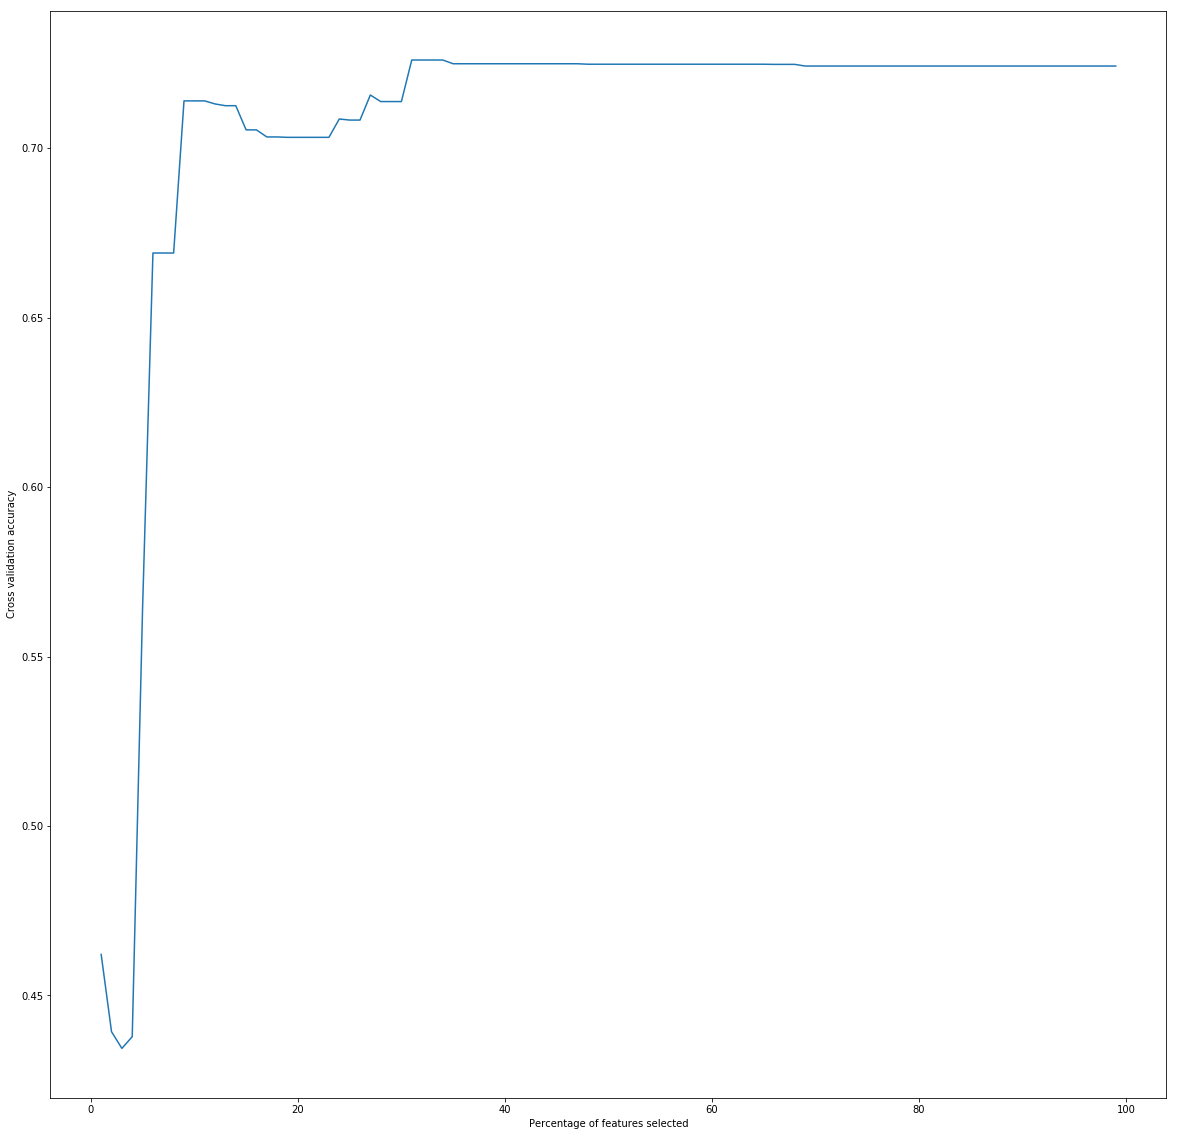

In [15]:
from sklearn import metrics
from sklearn import feature_selection

from sklearn import cross_validation
linmod = Lasso(alpha=0.5264105263157894)

percentiles = range(1, 100, 1)
results = []
for i in range(1, 100, 1):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_fs = fs.fit_transform(x, y)
    scores = cross_validation.cross_val_score(linmod, x_fs, y, cv=5)
    results = np.append(results, scores.mean())
    #print i,scores.mean()

optimal_percentile = percentiles[np.where(results == results.max())[0][0]]
print  "Optimal percentile of features:{0}".format(optimal_percentile), "\n"
optimal_num_features = optimal_percentile*len(x.columns)/100
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)
pl.rcParams["figure.figsize"] = [1,1]
pl.show()

9th precentile r-squared = 0.713949119516956
32nd percentile r-squared = 0.7260068759050913
(not shown to save screen space)


The optput says optimal percentile is 32, but improvement is marginal from percentile 9. Choosing less variables and easier interpretability, while sacrificing 0.012 (1.2%) of explained variability.

##### Final Lasso Model with Feature Selection

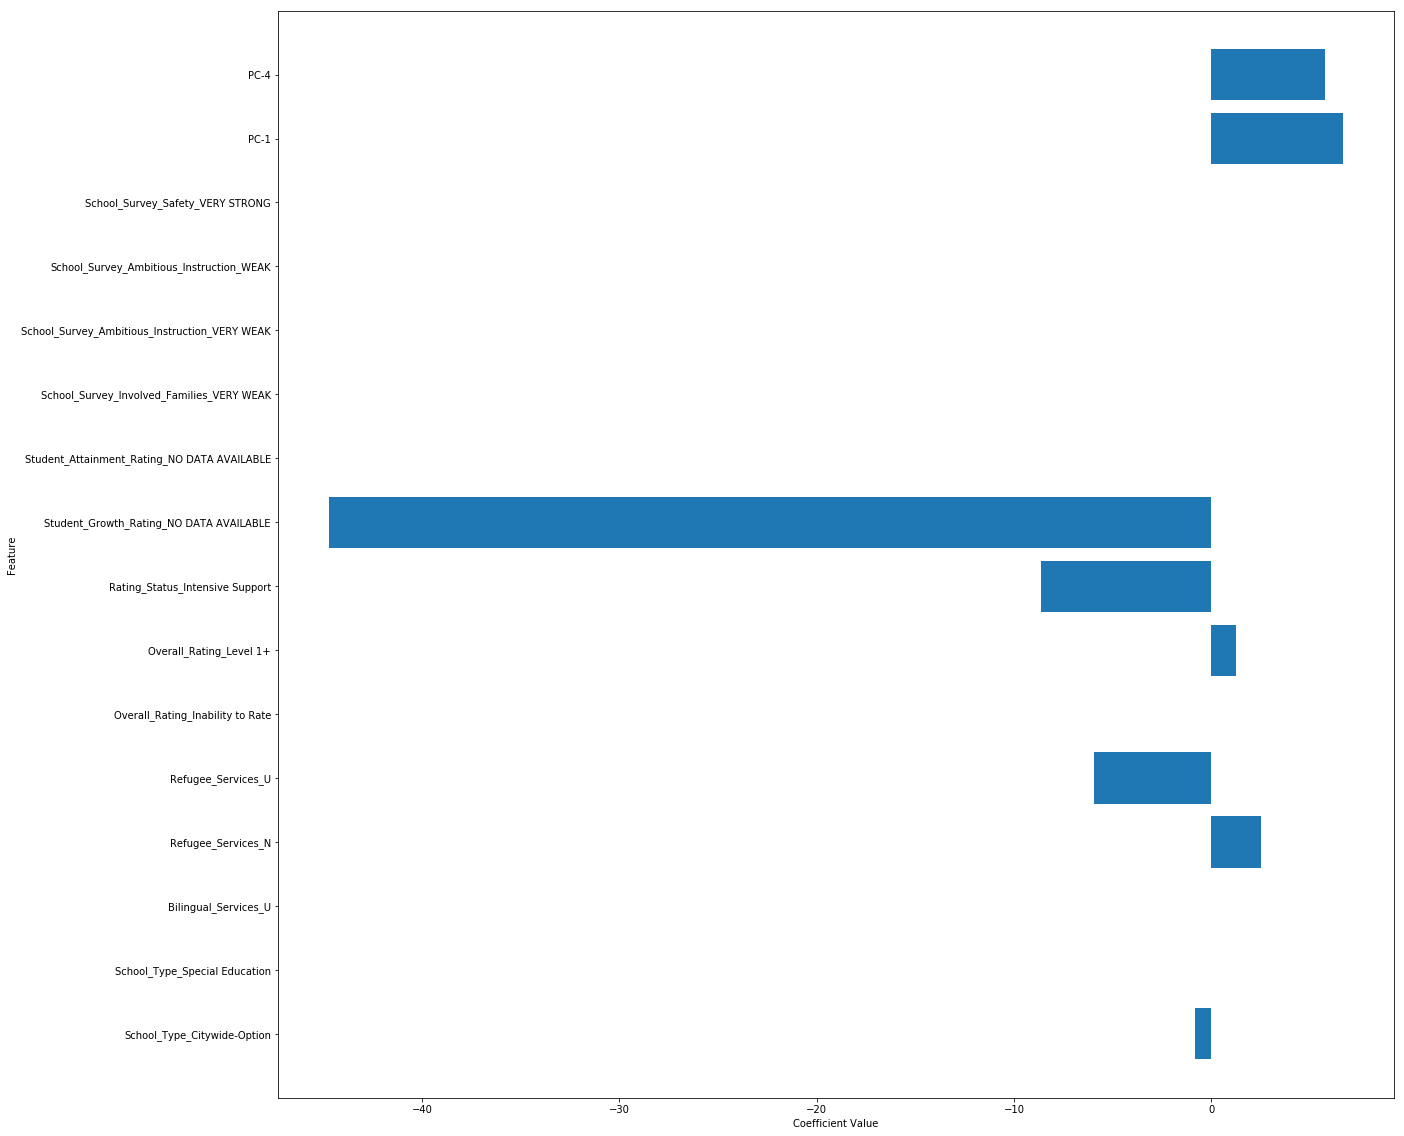

In [14]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=9)
x_fs = fs.fit_transform(x, y)
linmod.fit(x_fs, y)
names = x.columns.values
%matplotlib inline
fig_size = pl.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20

def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)
    pl.rcParams["figure.figsize"] = fig_size
    
plot_coefficients(linmod, len(names[fs.get_support(indices=True)]), names[fs.get_support(indices=True)])

In [64]:

pd.DataFrame(data_scaled_pca.components_[[0,3],:],columns=continuous_scaled.columns,index = ['PC-1','PC-4']).T


,PC-1,PC-4
Student_Count_Total,0.127903,0.150655
Average_ACT_School,0.218831,0.280389
College_Enrollment_Rate_School,0.161563,0.240454
Growth_ACT_Grade_11_Pct,0.196258,0.154603
Attainment_ACT_Grade_11_Pct,0.299762,0.362679
Freshmen_On_Track_School_Pct_Year_2,0.124539,0.111214
College_Persistence_School_Pct_Year_2,0.229934,0.255024
lib_cnt,-0.020756,-0.056050
PRED_NON_ENG_PERCENT,-0.012025,0.024055
PERCENT OF HOUSING CROWDED,-0.133844,0.161644


-  ACT Results and College Persistence appear to be influential in both PC1 and PC4. 
-  PC1 also has higher loadings for positive impact from Hispanic / White ethnicity student ratios, and negative impact from Low Income and Black Ethnicity student ratios.
-  PC4 has positive impact from college enrollment and teacher attendance change. It has negative impact from low income percent of students and percent of students who are english learners.



### Approach 2: Full set of variables with/without feature selection

In [37]:
x=pd.read_csv('processed_scaled.csv',index_col=0)
x.drop('Graduation_Rate_School', axis=1,inplace=True)
y=pd.read_csv('grad_rate.csv', header=None)[1].values

##### Lasso

In [38]:
lasso = Lasso(max_iter=100000)
l_space = {'alpha': np.logspace(-4,1,20)}
grid = GridSearchCV(estimator=lasso, param_grid = l_space, scoring='neg_mean_squared_error', cv=5)
grid.fit(x, y)

print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Best RMSE: 8.936795436205257
{'alpha': 0.14384498882876628}


##### Ridge

In [39]:
ridge = Ridge(max_iter=100000)
r_space = {'alpha': np.logspace(-1,1,20)}
grid = GridSearchCV(estimator=ridge, param_grid = r_space, scoring='neg_mean_squared_error', cv=5)
grid.fit(x, y)

print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Best RMSE: 10.192947565943104
{'alpha': 2.3357214690901213}


##### Elastic Net

In [40]:
EN = ElasticNet(max_iter=100000)
en_space = {'alpha': np.logspace(-2,1,20), 'l1_ratio':np.linspace(0.01,1,10)}
grid = GridSearchCV(estimator=EN, param_grid = en_space, scoring='neg_mean_squared_error', cv=5)
grid.fit(x, y)

print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Best RMSE: 8.960413689993082
{'alpha': 0.12742749857031335, 'l1_ratio': 1.0}


### With Feature Selection

In [41]:
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

In [42]:
def get_opt_features(model, x, y):
    percentiles = range(1, 100, 10)
    results = []
    for i in range(1, 100, 10):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        x_fs = fs.fit_transform(x, y)
        scores = cross_val_score(model, x_fs, y, cv=5)
        results = np.append(results, scores.mean())

    optimal_percentile = percentiles[np.where(results == results.max())[0][0]]

    opt_fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_percentile)
    return x_fs, optimal_percentile

##### Lasso with FS

In [43]:
fs_lasso = Lasso(max_iter=50000)
x_best, p = get_opt_features(fs_lasso, x, y)

grid = GridSearchCV(estimator=fs_lasso, param_grid = l_space, scoring='neg_mean_squared_error',n_jobs=-1, cv=5)
grid.fit(x_best, y)

print 'Feature Percentage: '+str(p)
print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Feature Percentage: 31
Best RMSE: 8.906337218222868
{'alpha': 0.14384498882876628}


##### Ridge with FS

In [44]:
fs_ridge = Ridge()

grid = GridSearchCV(estimator=fs_ridge, param_grid = r_space, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_best, y)

print 'Feature Percentage: '+str(p)
print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Feature Percentage: 31
Best RMSE: 10.165434282194582
{'alpha': 2.3357214690901213}


##### Elastic Net with FS

In [45]:
fs_en = ElasticNet(max_iter=100000)

grid = GridSearchCV(estimator=fs_en, param_grid = en_space, scoring='neg_mean_squared_error',n_jobs=-1, cv=5)
grid.fit(x_best, y)

print 'Feature Percentage: '+str(p)
print 'Best RMSE: '+str(np.sqrt(grid.best_score_*-1))
print grid.best_params_

Feature Percentage: 31
Best RMSE: 8.919021455515187
{'alpha': 0.12742749857031335, 'l1_ratio': 1.0}


### Final Model - Lasso

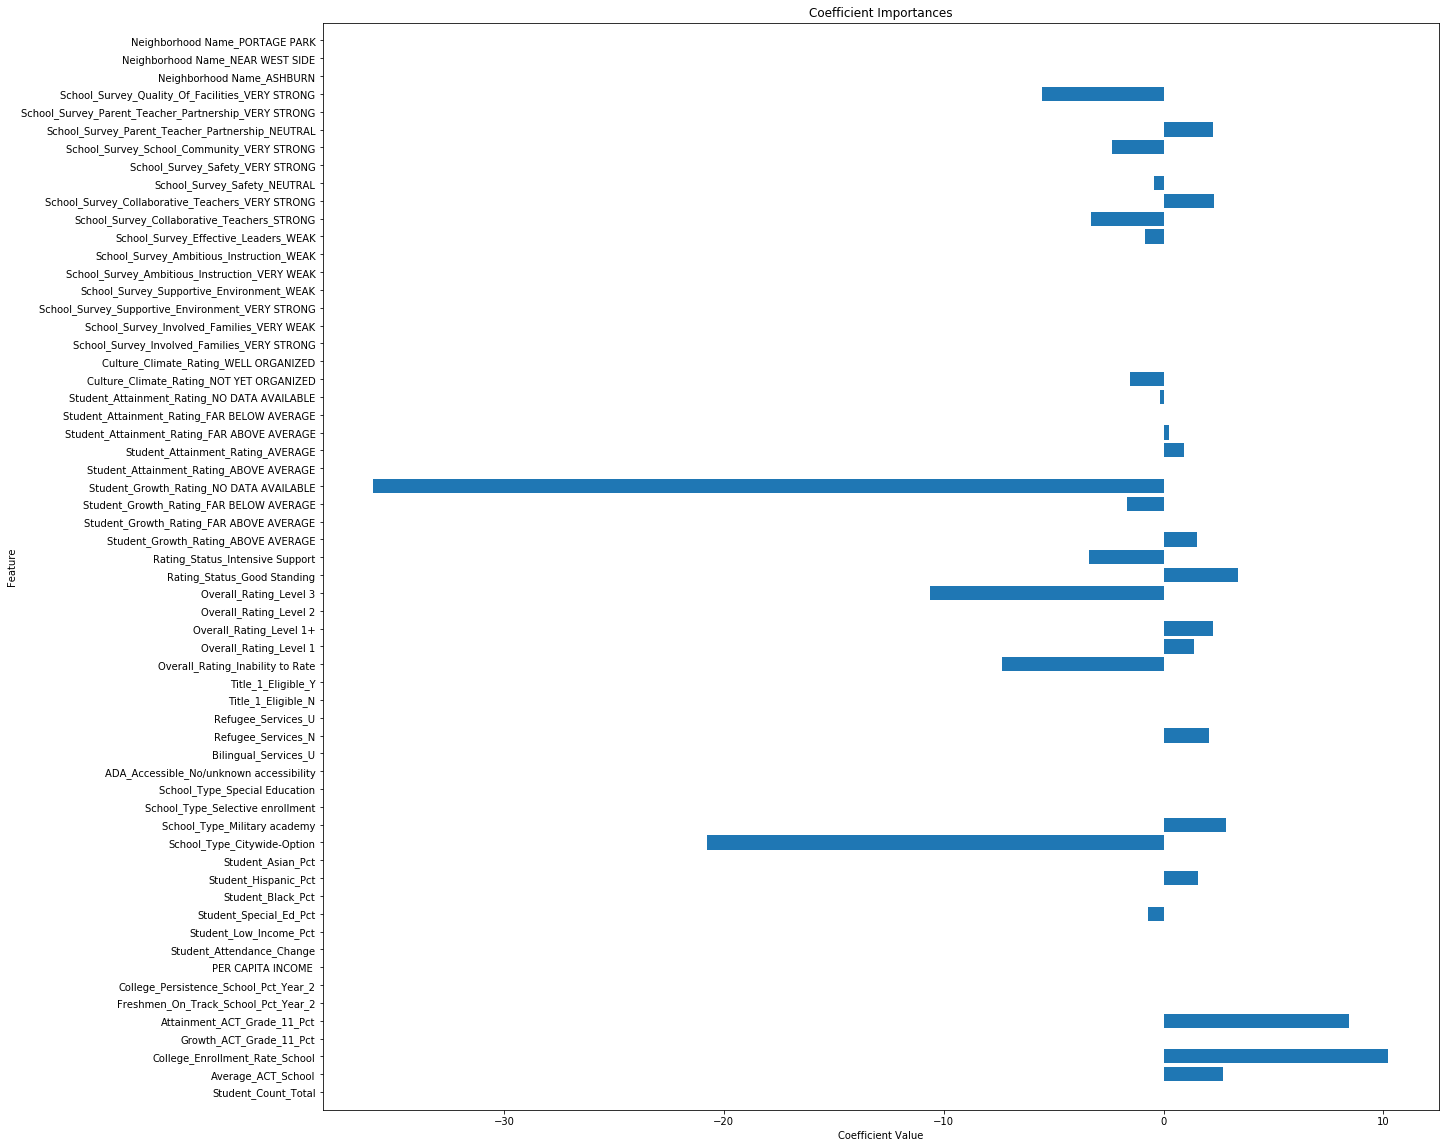

In [55]:
#get optimal features
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=31)
opt_fs=fs.fit_transform(x,y)

#build model
model=Lasso(alpha=0.14384498882876628)
mdl=model.fit(opt_fs,y)

# plot coefficient importances
names = x.columns.values
import pylab as pl
%matplotlib inline
fig_size = pl.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20

def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.title('Coefficient Importances')
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)
    pl.rcParams["figure.figsize"] = fig_size
    
plot_coefficients(mdl, len(names[fs.get_support(indices=True)]), names[fs.get_support(indices=True)])

## Overall Modeling Summary

### Random Forest Regressor

-  RMSE: 0.715

### Linear Modeling
#### Approach 1 - PCA and Categorical Features

-  Model Type: Lasso
-  Feature Selection: 16 variables
-  R^2: 0.714

#### Approach 2 - All Features

-  Model Type: Lasso
-  Feature Selection: 60 variables
-  R^2: 0.76

### General Takeaways:

1. Schools with no data available for student growth rating tend to have lower graduation rate. 
2. Rating status – intensive support has negative impact on school’s graduation rate. 
3. School Type – Citywide option has lower graduation rate.
4. High ACT results correlate to higher graduation rate.
5. Higher college enrollment rates correlate to higher graduation rates.